# 11장 영상분할
- 임계값을 정하고 이 값을 기준으로 그레이스케일 영상을 이진 영상으로 만든다.
- 영상이 가진 기하학적 특성으로 다루는 방법

In [2]:
import sys
import cv2
import numpy as np
import random

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [3]:
def on_trackbar(pos):
    bsize = pos
    if bsize % 2 == 0: bsize = bsize - 1
    if bsize < 3: bsize = 3

    dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, bsize, 5)

    cv2.imshow('dst', dst)


src = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

cv2.imshow('src', src)

cv2.namedWindow('dst')
cv2.createTrackbar('Block Size', 'dst', 0, 200, on_trackbar)
cv2.setTrackbarPos('Block Size', 'dst', 11)

cv2.waitKey()
cv2.destroyAllWindows()


## 적응적 이진화(부분조명) cv2.adaptiveThreshold

## OTSU 이진화 cv2.THRESH_OTSU
- 이미지에 대한 히스토그램에서 임계값을 자동으로 계산

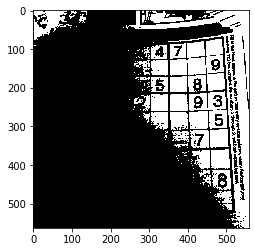

97.0


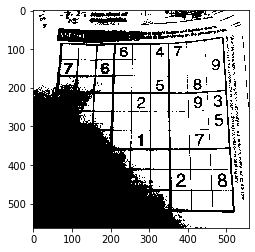

In [5]:
img = cv2.imread('sudoku.jpg', 0)
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
imshow("", binary)

t, binary2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(t)
imshow("", binary2)

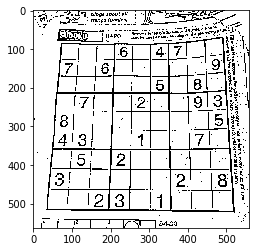

In [6]:
binary3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 11, 5)
#파라미터: 가우시안 or 평균/11by11으로 나타낼것인지: 숫자 클수록 값 결정 할 때 더 많은 픽셀을 보겠다는뜻= 제일 크면 평균과 같은 의미, 너무 작으면 너무 좁은 영역마다 threshold / 
#5: 평균으로부터 얼마 뺄지!, 평균값을 외부에서 조절하는거:0을주면 

imshow("", binary3)

- 배경은 0 전경은 255로 우리가 꺼내고싶은걸 흰색으로 만든다 생각

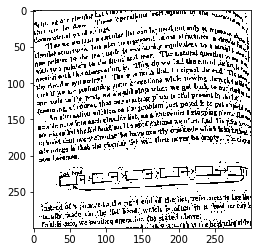

In [13]:
img = cv2.imread('text.jpg', 0)

binary4 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 11, 5)
imshow("", binary4)

예제3개

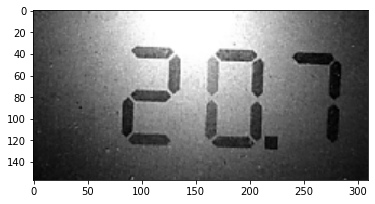

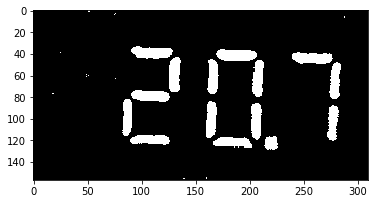

In [75]:
img = cv2.imread('207.png', cv2.IMREAD_GRAYSCALE)
imshow("", img)
img_blur= cv2.GaussianBlur(img, (17,17), 0) # 노이즈 조절 17 숫자
binary5 = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY | cv2.THRESH_BINARY_INV, 11, 2)
#조명이 있어서 adaptive,, cv2.THRESH_BINARY_INV : 결과 전환해주고싶을때
imshow("", binary5)

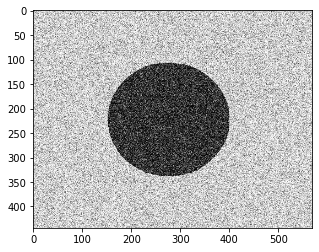

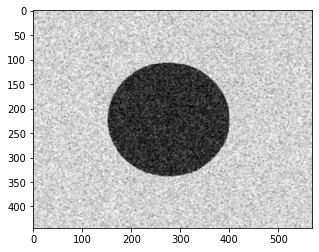

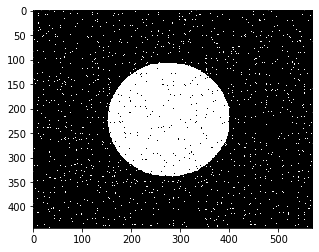

In [105]:
# 노이즈 남음
img = cv2.imread('circle.png', 0)
img_blur= cv2.GaussianBlur(img, (5,5), 0)
imshow("",img)
imshow("", img_blur)
_, binary6 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
imshow("", binary6)

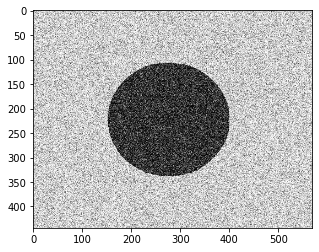

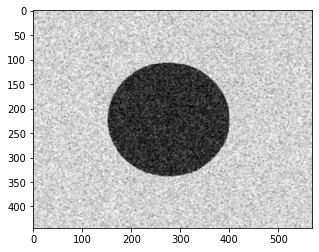

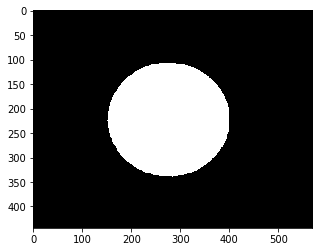

In [104]:
#정답
image = cv2.imread('circle.png',0)  
imshow("", image)
img_blur = cv2.GaussianBlur(image, (5,5), 0)
imshow("", img_blur)
_,binary = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
imshow("", binary)

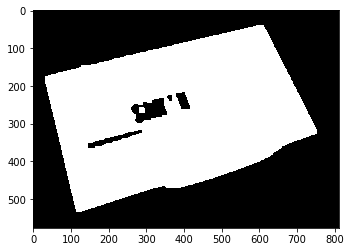

In [82]:
img = cv2.imread('namecard.png', 0)
gray = cv2.GaussianBlur(img, (7, 7), 0)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
_,binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY |  cv2.THRESH_OTSU)
open = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)   # MORPH_OPEN 제거해
closed = cv2.morphologyEx(open, cv2.MORPH_CLOSE, kernel, iterations=1)  #MORPH_close 채워

imshow("", closed )

## 배경 제거 cv2.createBackgroundSubtractorMOG2

In [3]:
cap = cv2.VideoCapture(0)  #tennis_ball.mp4  , car-overhead-1.avi

fgbg = cv2.createBackgroundSubtractorMOG2(varThreshold=100)

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)

    cv2.imshow('mask',fgmask)
    cv2.imshow('src',frame)

    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

## 연결 성분 레이블링 cv2.connectedComponentsWithStats

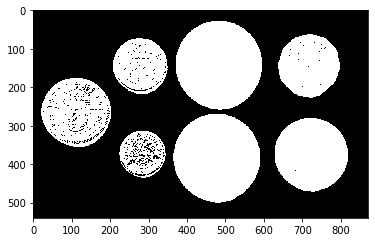

In [80]:
img= cv2.imread("coins2.png",0)
_, img_edge= cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
imshow("",img_edge)

In [81]:
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img_edge, connectivity=8)
#nb_: 연결된 갯수, output:레이블값, stats: cent:센터좌표

In [82]:
print(nb_components) #17개의 레이블링된 값
print(output.shape)
print(centroids)
print(stats.shape)
print(stats[0]) # [292574:]

17
(540, 871)
[[413.22645895 273.70274529]
 [483.14108923 142.07304916]
 [717.06125975 143.86770659]
 [278.57624576 143.8939473 ]
 [111.24864818 264.07462041]
 [107.         269.5       ]
 [477.62316095 383.23852286]
 [ 48.         273.        ]
 [722.9926831  374.55755496]
 [107.         284.5       ]
 [283.79082529 371.72431958]
 [258.         393.        ]
 [260.         394.        ]
 [255.         420.        ]
 [309.         422.        ]
 [304.         424.        ]
 [287.         428.        ]]
(17, 5)
[     0      0    871    540 292574]


cen [413.22645895 273.70274529]
cen [483.14108923 142.07304916]
cen [717.06125975 143.86770659]
cen [278.57624576 143.8939473 ]
cen [111.24864818 264.07462041]
cen [107.  269.5]
cen [477.62316095 383.23852286]
cen [ 48. 273.]
cen [722.9926831  374.55755496]
cen [107.  284.5]
cen [283.79082529 371.72431958]
cen [258. 393.]
cen [260. 394.]
cen [255. 420.]
cen [309. 422.]
cen [304. 424.]
cen [287. 428.]


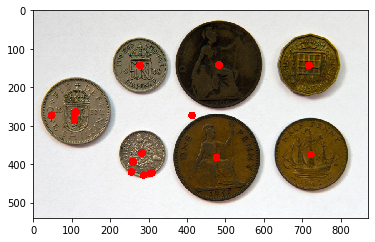

In [83]:
img  = cv2.imread("coins2.png")

for c in centroids :    
    print("cen",c)
    cv2.circle(img, (int(c[0]), int(c[1])), 10, (0,0,255), -1)
# 10:지름, (0,0,255): 빨간색, -1: 동그라미 안 다 채워주세요) , 
imshow("", img)    

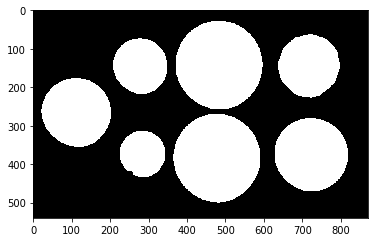

8


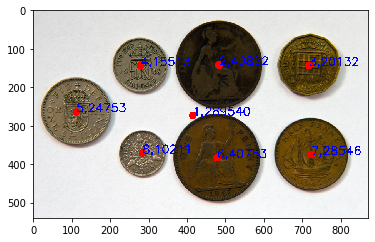

In [79]:
img  = cv2.imread("coins2.png", 0)
img = cv2.GaussianBlur(img, (7,7), 0)
_, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)

imshow("", binary)

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img_edge, connectivity=8)

print(nb_components)

img  = cv2.imread("coins2.png")

font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX  

i = 1
for c in centroids :    
    cv2.circle(img, (int(c[0]), int(c[1])), 10, (0,0,255), -1)
    cv2.putText(img, f"{i},{stats[i-1][4]}", 
                (int(c[0]), int(c[1])), font, 1.0, (255,0,0), 2)
    i += 1
    
imshow("", img) 

## 영상 특징 추출
### 허프 변환
### cv2.HoughLinesP 직선 검출

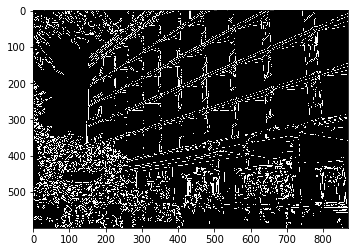

In [101]:
import math
src = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)
edge = cv2.Canny(src, 50, 150)

imshow("", edge)

lines = cv2.HoughLinesP(edge, 1, math.pi / 180, 160, minLineLength=50, maxLineGap=5)
# 주로 160과, minLine 값만 조절 :160은 엣지양과 비교하여 많으면 큰 수 적으면 적은 수 넣어야함
# edge, 1, math.pi / 180 : 거의 고정 파라미터, 내가 검출할 직선의 최소길이는 50, 라인과 라인 사이에 존재할수있는 최대직선개수5개
#lines에는 검출된 직선 개수 나옴

In [102]:
print(type(lines))
print(lines.shape)
#검출된 라인이 113개

print(lines[0,0,:]) #시작점이 180,309고 마지막점이 737,72 지나는 직선임
print(lines[1,0,:]) #시작점이 329,398고 마지막점이 385,388 지나는 직선임

<class 'numpy.ndarray'>
(113, 1, 4)
[180 309 737  72]
[329 398 385 388]


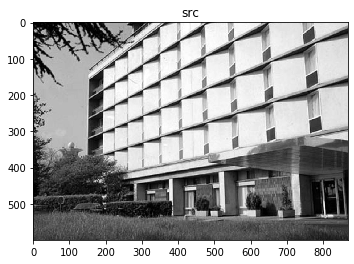

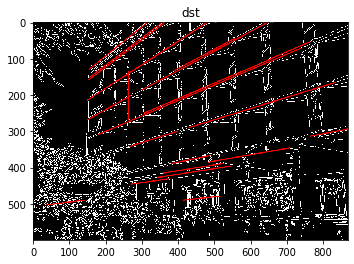

True

In [94]:
dst = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1])
            pt2 = (lines[i][0][2], lines[i][0][3])
            cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

imshow('src', src)
imshow('dst', dst)
cv2.imwrite("output.png", dst)

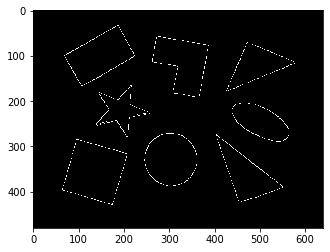

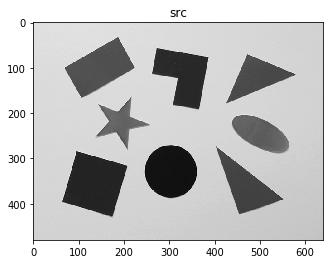

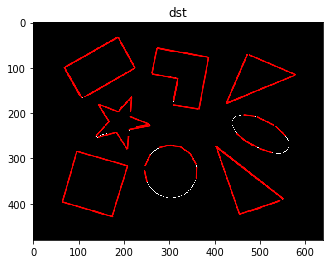

In [97]:
import math
src = cv2.imread('polygon.bmp', cv2.IMREAD_GRAYSCALE)
edge = cv2.Canny(src, 50, 150)

imshow("", edge)

lines = cv2.HoughLinesP(edge, 1, math.pi / 180, 10, minLineLength=20, maxLineGap=5)
# 엣지 적으니 10 넣어봄

dst = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1])
            pt2 = (lines[i][0][2], lines[i][0][3])
            cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

imshow('src', src)
imshow('dst', dst)

# 장점: 중간이 끊어져 있어도 검출 가능


- 자동차 도로 예제

In [1]:
import math
src = cv2.imread('lane.jpg', cv2.IMREAD_GRAYSCALE)
src = cv2.GaussianBlur(src, (15,15),0)
edge= cv2.Canny(src, 100,200)

imshow("", edge)

lines = cv2.HoughLinesP(edge, 1, math.pi / 180, 10, minLineLength=20, maxLineGap=5)

dst = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1])
            pt2 = (lines[i][0][2], lines[i][0][3])
            cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

imshow('dst', dst)


NameError: name 'cv2' is not defined

- 예제2: 기울기 값 출력

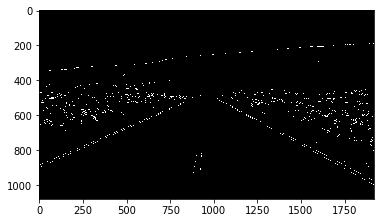

9


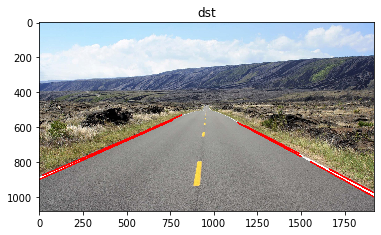

In [5]:
import math
src = cv2.imread('lane.jpg', cv2.IMREAD_GRAYSCALE)
src = cv2.GaussianBlur(src, (11, 11), 0)
edge = cv2.Canny(src, 60, 150)

imshow("", edge)

lines = cv2.HoughLinesP(edge, 1, math.pi / 180, 10,  minLineLength=200, maxLineGap=5)

dst = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

src = cv2.imread('lane.jpg')

print(lines.shape[0])
for i in range(lines.shape[0]):
    pt1 = (lines[i][0][0], lines[i][0][1])
    pt2 = (lines[i][0][2], lines[i][0][3])
    cv2.line(src, pt1, pt2, (0, 0, 255), 7, cv2.LINE_AA)
imshow('dst', src)    

In [6]:
print(lines.shape[0])
print(lines)
for i in range(lines.shape[0]):
    pt1 = (lines[i][0][0], lines[i][0][1])
    pt2 = (lines[i][0][2], lines[i][0][3])  # [i][0][2] 두번째 점의 x , [i][0][3] 두번째점의 y
    
print(pt1, pt2)

9
[[[  20  876  353  734]]

 [[   2  899  538  661]]

 [[1137  574 1503  769]]

 [[ 578  637  818  531]]

 [[1558  799 1918  998]]

 [[ 295  758  569  641]]

 [[1180  592 1493  752]]

 [[1664  840 1915  973]]

 [[ 506  676  764  561]]]
(506, 676) (764, 561)


In [7]:
w=  (pt1[1]-pt2[1] )/(pt1[0] - pt2[0]) 
print(w)

-0.44573643410852715


-0.4264264264264264
-0.44402985074626866
0.5327868852459017
-0.44166666666666665
0.5527777777777778
-0.42700729927007297
0.5111821086261981
0.5298804780876494
-0.44573643410852715


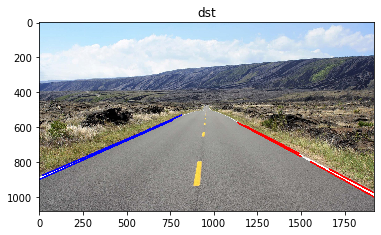

In [8]:
for i in range(lines.shape[0]):
    pt1 = (lines[i][0][0], lines[i][0][1])
    pt2 = (lines[i][0][2], lines[i][0][3])  # [i][0][2] 두번째 점의 x , [i][0][3] 두번째점의 y
    w=  (pt1[1]-pt2[1] )/(pt1[0] - pt2[0])
    print(w)
    if w> 0:
        col= (0,0,255)
    else:
        col=(255,0,0)
    
    cv2.line(src,pt1,pt2,col,7, cv2.LINE_AA)

imshow('dst',src)

In [9]:
for i in range(lines.shape[0]):
    pt1 = (lines[i][0][0], lines[i][0][1])
    pt2 = (lines[i][0][2], lines[i][0][3])  # [i][0][2] 두번째 점의 x , [i][0][3] 두번째점의 y
    w=  (pt1[1]-pt2[1] )/(pt1[0] - pt2[0])
    print(w)
    if w> 0:
        rightlane= (pt1, pt2)
    else:
        leftlane= (pt1, pt2)
    
print(rightlane)
print(leftlane)

-0.4264264264264264
-0.44402985074626866
0.5327868852459017
-0.44166666666666665
0.5527777777777778
-0.42700729927007297
0.5111821086261981
0.5298804780876494
-0.44573643410852715
((1664, 840), (1915, 973))
((506, 676), (764, 561))


In [10]:
poly= []
poly.append(list(leftlane[0]))
poly.append(list(leftlane[1]))
poly.append(list(rightlane[0]))
poly.append(list(rightlane[1]))

print(poly)

[[506, 676], [764, 561], [1664, 840], [1915, 973]]


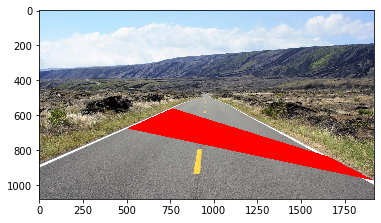

In [11]:
src= cv2.imread('lane.jpg')
poly= np.array(poly)
cv2.fillPoly(src, [poly], (0,0,255))
imshow("", src)

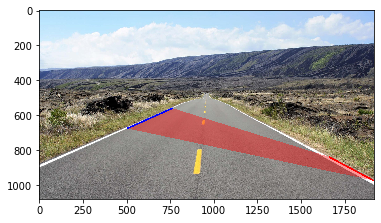

In [12]:
src= cv2.imread('lane.jpg')
mask=src.copy()
poly= np.array(poly)
cv2.fillPoly(mask, [poly], (0,0,255))
blend=cv2.addWeighted(mask,0.4, src,0.6, 0)

cv2.line(blend, leftlane[0], leftlane[1], (255,0,0), 7, cv2.LINE_AA)
cv2.line(blend, rightlane[0], rightlane[1], (0,0, 255), 7, cv2.LINE_AA)

imshow("",blend)

In [13]:
leftlane = []
rightlane = []

In [19]:
#선이 끊어지지않게 하려면? 최대최소값 리스트에 넣어야한다는뎅
for i in range(lines.shape[0]):
    pt1 = (lines[i][0][0], lines[i][0][1])
    pt2 = (lines[i][0][2], lines[i][0][3])  # [i][0][2] 두번째 점의 x , [i][0][3] 두번째점의 y
    w=  (pt1[1]-pt2[1] )/(pt1[0] - pt2[0])
    print(w)
    if w < 0 :
        leftlane.append(list(pt1))
        leftlane.append(list(pt2))
    else :
        rightlane.append(list(pt1))
        rightlane.append(list(pt2))       
    
print(rightlane)
print(leftlane)

-0.4264264264264264
-0.44402985074626866
0.5327868852459017
-0.44166666666666665
0.5527777777777778
-0.42700729927007297
0.5111821086261981
0.5298804780876494
-0.44573643410852715
[(1664, 840), (1915, 973), [1137, 574], [1503, 769], [1558, 799], [1918, 998], [1180, 592], [1493, 752], [1664, 840], [1915, 973]]
[(506, 676), (764, 561), [20, 876], [353, 734], [2, 899], [538, 661], [578, 637], [818, 531], [295, 758], [569, 641], [506, 676], [764, 561]]


In [20]:
leftlane = np.array(leftlane)
rightlane = np.array(rightlane)

p1 = np.min(leftlane[:,0]), np.max(leftlane[:,1]) 
p2 = np.max(leftlane[:,0]), np.min(leftlane[:,1]) 
leftlane = [p1,p2]
print(leftlane)

p1 = np.min(rightlane[:,0]), np.min(rightlane[:,1]) 
p2 = np.max(rightlane[:,0]), np.max(rightlane[:,1]) 
rightlane = [p1,p2]
print(rightlane)

[(2, 899), (818, 531)]
[(1137, 574), (1918, 998)]


In [22]:
poly= []
poly.append(list(leftlane[0]))
poly.append(list(leftlane[1]))
poly.append(list(rightlane[0]))
poly.append(list(rightlane[1]))

print(poly)

[[2, 899], [818, 531], [1137, 574], [1918, 998]]


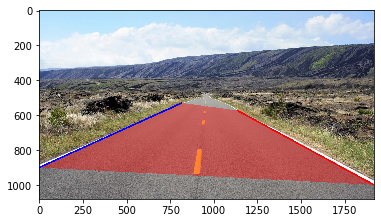

In [23]:
src= cv2.imread('lane.jpg')
mask=src.copy()
poly= np.array(poly)
cv2.fillPoly(mask, [poly], (0,0,255))
blend=cv2.addWeighted(mask,0.4, src,0.6, 0)

cv2.line(blend, leftlane[0], leftlane[1], (255,0,0), 7, cv2.LINE_AA)
cv2.line(blend, rightlane[0], rightlane[1], (0,0, 255), 7, cv2.LINE_AA)

imshow("",blend)

##  원 검출 cv2.HoughCircles
- 해당위치가 센터일때 이 원이

In [8]:
src= cv2.imread('coins.png', cv2.IMREAD_GRAYSCALE)

blurred= cv2.blur(src, (3,3))
circles= cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 50, param1=150, param2= 30)

print(circles.shape) #10이 갯수, line할때랑 순서가 달리 출력됨
print(circles)

(1, 10, 3)
[[[173.5 119.5  28.8]
  [119.5 207.5  29.6]
  [216.5  69.5  27.9]
  [146.5  33.5  27.9]
  [108.5  82.5  22.4]
  [ 94.5 145.5  28.5]
  [264.5 101.5  24.1]
  [ 55.5  49.5  24.1]
  [235.5 173.5  24.6]
  [ 36.5 108.5  30.3]]]


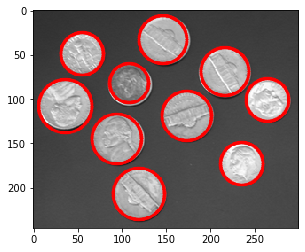

In [9]:
dst= cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)
for i in range(circles.shape[1]): 
    cx, cy, radius= circles[0][i]
    cv2.circle(dst,(cx,cy),int(radius), (0,0,255), 2, cv2.LINE_AA )

imshow("", dst)

- 예제

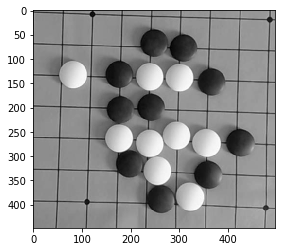

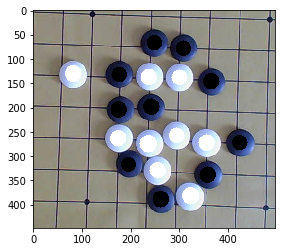

In [31]:
img= cv2.imread('stone.png')
# img= cv2.medianblur(img, 5) : 과하게 블러하기땜 안잡히는 부분 생김
img = cv2.GaussianBlur(img, (3, 3), 0)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow("", gray)

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 
            20, param1=50, param2=30, minRadius=10, maxRadius=50)
# 1 : 동일해상도
# 20 : 검출한 원의 중심과의 최소거리. 낮으면 원이 아닌 것이 검출
# param1 : canny edge 전달값
# param2 : 작으면 잘못 검출, 크면 검출률이 낮아짐

dst = cv2.imread('stone.png')

for i in range(circles.shape[1]):
    cx, cy, radius = circles[0][i]
    g = gray[int(cy), int(cx) ]
    if g > 128 :        
        cv2.circle(dst, (cx, cy), int(radius*0.6), (255, 255, 255), -1)
    else :
        cv2.circle(dst, (cx, cy), int(radius*0.6), (0, 0, 0), -1)               
    
imshow("", dst)

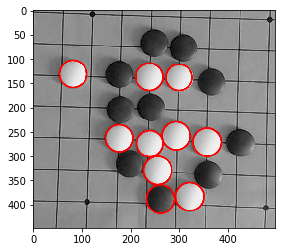

In [26]:
dst= cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)
for i in range(circles.shape[1]): 
    cx, cy, radius= circles[0][i]
    cv2.circle(dst,(cx,cy),int(radius), (0,0,255), 2, cv2.LINE_AA )
    print(gray[int(cy),int(cx)])
imshow("", dst)
# 센터값이 cx,cy 이므로 그 색으로 평균 구해 까만돌인지 흰돌인지 해보수있을것
# cv2.circle(dst,(cx,cy) 좌표 찍을땐 xy 순서 / 행렬할때는 gray[cy,cx] yx 순서

## 코너 검출 cv2.cornerHarris
- 엣지는 옆 픽셀, 아래픽셀만 보는데 코너는 주변 픽셀 모두 봄

In [34]:
src= cv2.imread("building.jpg", cv2.IMREAD_GRAYSCALE)

harris= cv2.cornerHarris(src, 3, 3, 0.04)
print(harris)
print(harris.shape) #원본영상과 같은 크기, 각 지점에서 R값나와서.

[[ 6.3535038e-11  3.9825465e-10  1.1062862e-09 ...  3.4808958e-10
   2.2088404e-11  1.0773762e-11]
 [ 5.5882576e-10  8.2385315e-10  1.4708644e-09 ...  6.2124239e-10
   1.7738422e-11  8.5010117e-11]
 [ 6.1618904e-11  4.2587414e-10  5.8720817e-10 ...  2.0738461e-10
  -3.8780326e-11 -9.1068139e-11]
 ...
 [ 1.7565064e-08  6.8799721e-09 -4.7442470e-08 ...  1.6815744e-07
  -8.9175529e-09 -7.0084232e-09]
 [-5.2044825e-08 -4.4564167e-08 -4.8254844e-08 ...  2.7257241e-07
  -7.8746627e-09 -6.3438756e-09]
 [-7.3713522e-08 -5.3394622e-08 -3.6134686e-08 ...  4.1195358e-07
  -1.5567483e-08 -1.3638399e-08]]
(600, 868)


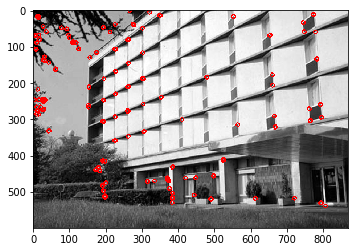

In [36]:
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 120:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)
imshow("",dst)
#120 바꿔가면서 어떤 점들 표시되는지

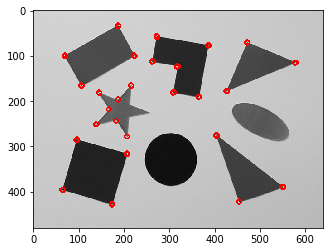

In [40]:
src= cv2.imread("polygon.bmp", cv2.IMREAD_GRAYSCALE)

harris= cv2.cornerHarris(src, 3, 3, 0.04)

harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 85:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)
imshow("",dst)

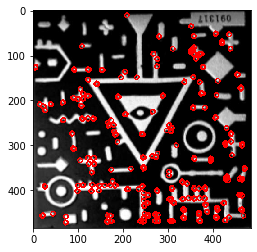

In [42]:
src= cv2.imread("sample.jpg", cv2.IMREAD_GRAYSCALE)

harris= cv2.cornerHarris(src, 3, 3, 0.04)

harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 120:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)
imshow("",dst)

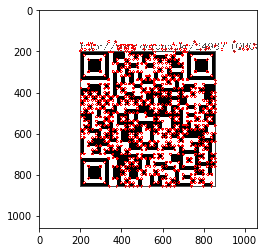

In [44]:
src= cv2.imread("out.png", cv2.IMREAD_GRAYSCALE)

harris= cv2.cornerHarris(src, 3, 3, 0.04)

harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 100:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)
imshow("",dst)